In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Uploading dataset from drive
data= pd.read_csv("/content/drive/MyDrive/Feynn Labs/mcdonalds.csv")

In [3]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
data.shape

(1453, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
data.isnull().sum()

,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0
healthy,0


In [8]:
#Extracting the segmentation variables from data

seg_data = data.iloc[:,0:11]

In [9]:
seg_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [10]:
#Percentage of yes in data
for col in seg_data.columns:
  print(f'Percentage of people who consider McDonald\'s food as {col}: {(seg_data[col][seg_data[col] == "Yes"].count() / len(seg_data[col]))*100}')


Percentage of people who consider McDonald's food as yummy: 55.26496902959395
Percentage of people who consider McDonald's food as convenient: 90.77770130763938
Percentage of people who consider McDonald's food as spicy: 9.359944941500343
Percentage of people who consider McDonald's food as fattening: 86.71713695801789
Percentage of people who consider McDonald's food as greasy: 52.649690295939436
Percentage of people who consider McDonald's food as fast: 90.02064693737096
Percentage of people who consider McDonald's food as cheap: 59.876118375774254
Percentage of people who consider McDonald's food as tasty: 64.41844459738472
Percentage of people who consider McDonald's food as expensive: 35.788024776324846
Percentage of people who consider McDonald's food as healthy: 19.88988300068823
Percentage of people who consider McDonald's food as disgusting: 24.294562973158982


In [11]:
#Converting Yes/No to 1/0

map = { "Yes": 1 , "No" : 0}

for col in seg_data.columns:
  seg_data[col] = seg_data[col].map(map)


In [12]:
seg_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


# **PCA**

In [13]:
''' Exploring data initially is to compute a principal components analysis, and create a perceptual map. A perceptual map offers initial insights into
    how attributes are rated by respondents and, importantly, which attributes tend to be rated in the same way. '''

#Performing PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=11)
pca_result = pca.fit_transform(seg_data)


In [14]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
standard_deviation = np.sqrt(pca.explained_variance_)

# Creating a DataFrame to display the results in a readable format
summary_df = pd.DataFrame({
    'Standard Deviation': standard_deviation,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
})


In [15]:
#From PCA analysis first 2 variables capture about 50% of the information contained in segmentation variable
summary_df

,Standard Deviation,Proportion of Variance,Cumulative Proportion
0,0.757050,0.299447,0.299447
1,0.607456,0.192797,0.492244
2,0.504619,0.133045,0.625290
3,0.398799,0.083096,0.708386
4,0.337405,0.059481,0.767866
5,0.310275,0.050300,0.818166
6,0.289697,0.043849,0.862015
7,0.275122,0.039548,0.901563
8,0.265251,0.036761,0.938323
9,0.248842,0.032353,0.970677


In [16]:
# The components of PCA represent the eigenvectors, which are equivalent to factor loadings
factor_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Convert to a DataFrame for better readability
loadings_df = pd.DataFrame(factor_loadings, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=seg_data.columns)

print(loadings_df)


                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.361062  0.220986 -0.153628  0.021999 -0.103764  0.052976   
convenient -0.117594  0.009971 -0.031546 -0.056799  0.093666 -0.107923   
spicy      -0.004812  0.011425 -0.018680  0.078810  0.023828 -0.110174   
fattening   0.087993 -0.020711 -0.162669 -0.141230 -0.024767 -0.126131   
greasy      0.230478 -0.038779 -0.404893  0.101279  0.121938  0.064955   
fast       -0.082135 -0.052832 -0.032619 -0.038828  0.036416 -0.184499   
cheap      -0.255266 -0.370932 -0.075345  0.047440 -0.043516 -0.032033   
tasty      -0.356959  0.186682 -0.144959 -0.001016 -0.071158 -0.023865   
expensive   0.249101  0.365255  0.012311  0.027045 -0.001054 -0.081088   
healthy    -0.161790  0.046527  0.096913  0.304478  0.097121 -0.055299   
disgusting  0.283707 -0.084835 -0.044695  0.147372 -0.246039 -0.065430   

                 PC7       PC8       PC9      PC10      PC11  
yummy      -0.081265  0.003588  0.151830 -0.0274

By looking at the factor loadings, we can observe that PC2 has high absolute value for Cheap and Expensive, which indicates that PC2 describes price dimension.

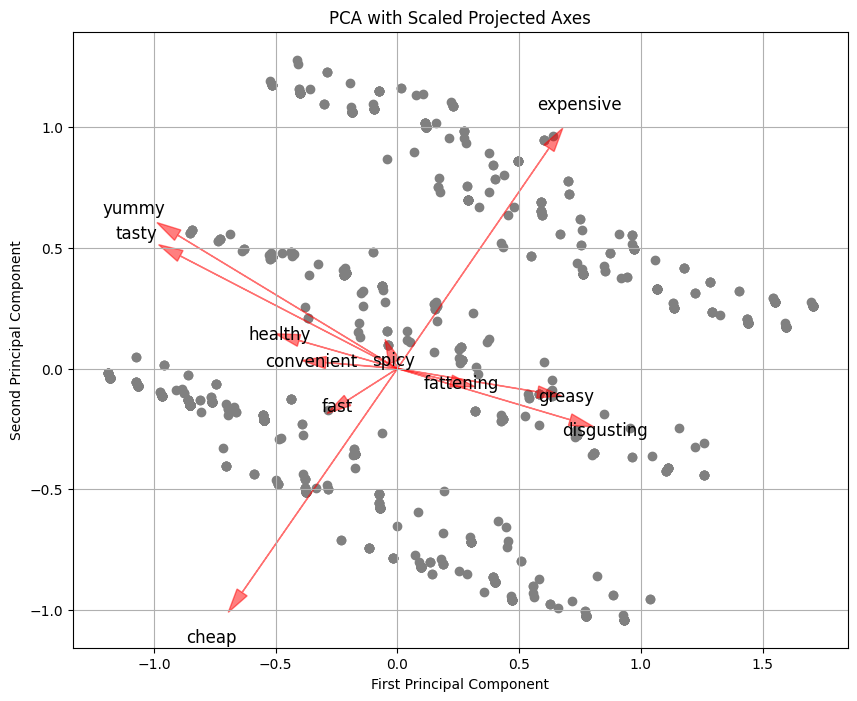

In [17]:
scaling_factor = 2.5  # Scaling factor for better visualization
scaled_factor_loadings = factor_loadings * scaling_factor

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='grey')

# Plot the original axes (variable projections) with scaled arrows
for i, var in enumerate(seg_data.columns):
    plt.arrow(0, 0, scaled_factor_loadings[i, 0], scaled_factor_loadings[i, 1],
              color='red', alpha=0.5, head_width=0.05 , head_length=0.1)
    plt.text(scaled_factor_loadings[i, 0] * 1.2, scaled_factor_loadings[i, 1] * 1.2, var,
             color='black', ha='center', va='center', fontsize=12)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA with Scaled Projected Axes')
plt.grid()
plt.show()

# **K-Means Clustering**

In [18]:
from sklearn.cluster import KMeans

In [19]:
def inertia(data):
  wcss=[]  # Within Cluster Sum of Squared distance also know as Inertia
  for i in range(1,11):
    kmeans= KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

  return wcss


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

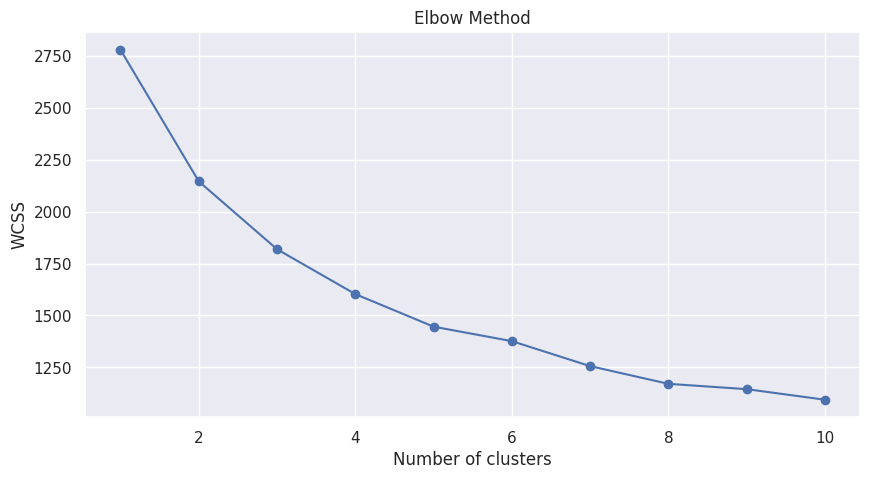

In [20]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
cluster_range= range(1,11)
wcss= inertia(seg_data)
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

By using Elbow curve method, it gives us a guideline that a segment between 4 and 6 is a good choice (elbow bend). However this can be confirmed by checking global stability.

In [21]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

In [22]:
np.random.seed(1234)


In [23]:
def bootstrap_kmeans(data, n_clusters, nrep=10, nboot=100):
    stability_scores = []

    for _ in range(nboot):
        # Generate a bootstrap sample
        boot_sample = resample(data, replace=True)

        # Perform k-means clustering with multiple initializations
        best_labels = None
        best_score = -1

        for _ in range(nrep):
            kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=np.random.randint(0, 10000))
            labels = kmeans.fit_predict(boot_sample)

            # Adjusted Rand Index calculation
            if best_labels is not None:
                score = adjusted_rand_score(best_labels, labels)
                best_score = max(best_score, score)
            best_labels = labels

        # Calculate the stability (adjusted Rand index)
        stability_scores.append(best_score)

    return stability_scores


In [24]:
n_clusters_range = range(2, 9)  # From 2 to 8 clusters
stability_results = {}

for n_clusters in n_clusters_range:
    stability_results[n_clusters] = bootstrap_kmeans(seg_data, n_clusters)


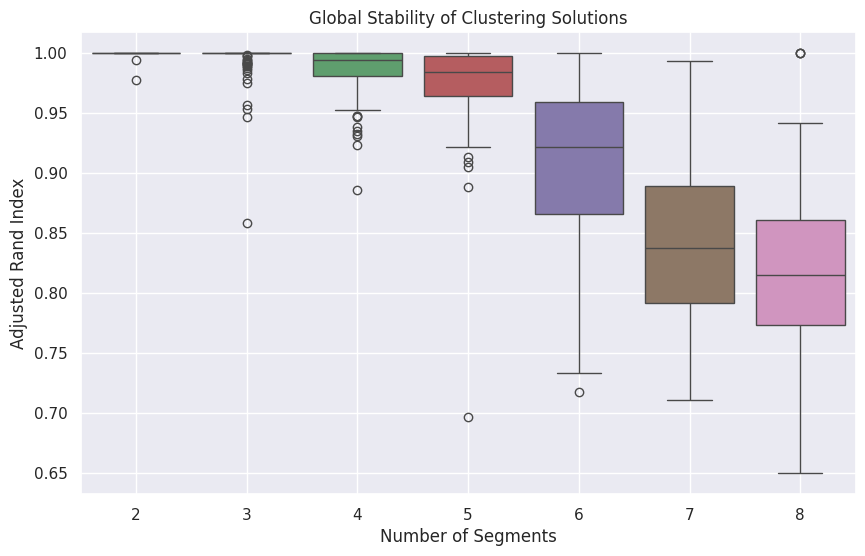

In [25]:
plt.figure(figsize=(10, 6))

# Prepare data for boxplot
stability_data = [stability_results[k] for k in n_clusters_range]

# Create boxplot
sns.boxplot(data=stability_data)
plt.xticks(ticks=np.arange(len(n_clusters_range)), labels=[str(k) for k in n_clusters_range])
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability of Clustering Solutions')
plt.grid(True)
plt.show()


The vertical boxplots show the distribution of stability for each number of
segments. The median is indicated by the fat black horizontal line in the middle
of the box. Higher stability is better.

Inspecting the above graph shows that the two-, three- and four-segment solutions as being quite stable. However, the two- and three-segment solutions do not offer a very differentiated view of the market. Solutions containing a small number of segments typically lack the market insights managers are interested in.

Once we increase the number of segments to five, average stability drops quite dramatically. The four-segment solution thus emerges as the solution containing the most market segments which can still be reasonably well replicated if the calculation is repeated multiple times.

Thus the optimal number of Segments is 4.

# **Gorge Plot**

Visualizes the similarity distribution within each segment.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


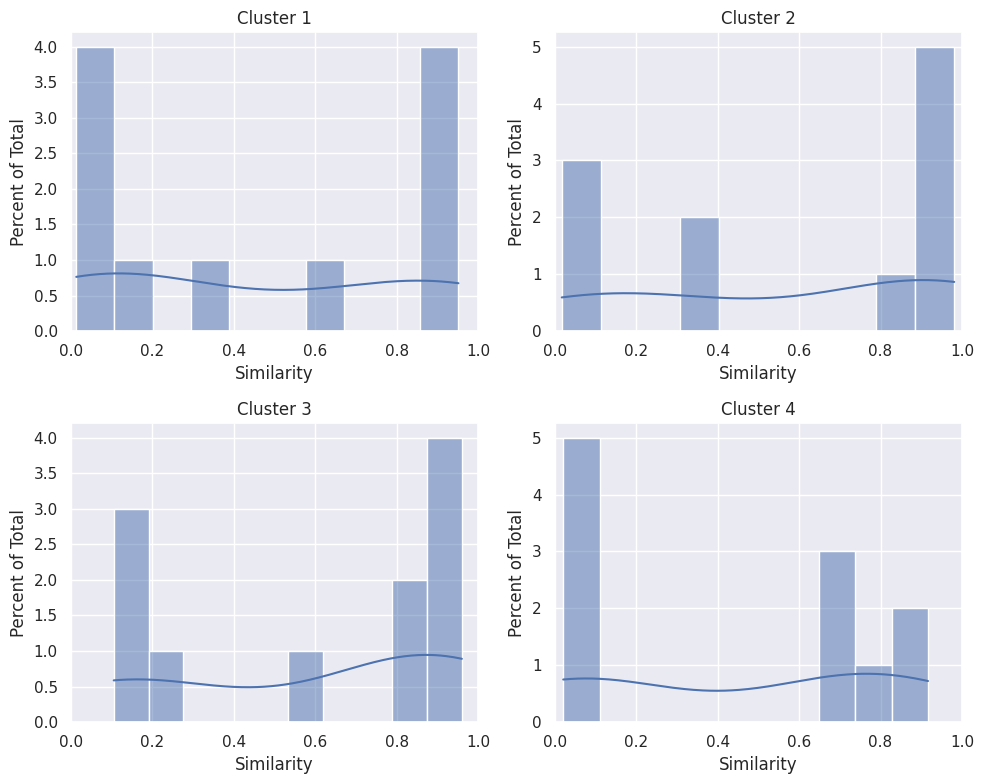

In [26]:
# KMeans clustering for 4 segments
kmeans = KMeans(n_clusters=4, random_state=0).fit(seg_data)
labels = kmeans.labels_

# Plot histogram for each cluster
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i in range(4):
    cluster_data = seg_data[labels == i]
    similarity_values = cluster_data.mean(axis=0)  # Adjust according to how you calculate similarity
    sns.histplot(similarity_values, bins=10, kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_xlim(0, 1)
    axes[i//2, i%2].set_title(f'Cluster {i + 1}')
    axes[i//2, i%2].set_xlabel('Similarity')
    axes[i//2, i%2].set_ylabel('Percent of Total')

plt.tight_layout()
plt.show()


# **Segment Level Stability Across Solutions (SLSA) Plot:**

 Illustrates how segments evolve as you increase the number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

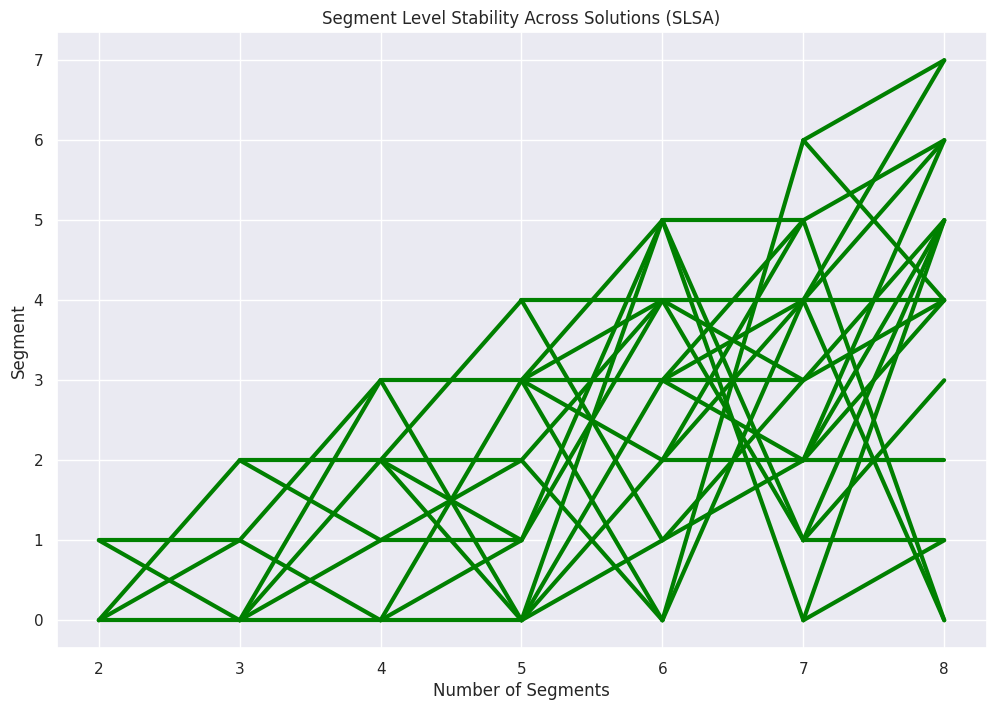

In [27]:
from sklearn.metrics import pairwise_distances_argmin_min

# Function to plot SLSA for a range of cluster solutions
def plot_slsa(data, max_clusters=8):
    fig, ax = plt.subplots(figsize=(12, 8))

    previous_labels = None
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data)
        labels = kmeans.labels_

        if previous_labels is not None:
            for i in range(previous_labels.max() + 1):
                cluster_members = previous_labels == i
                current_clusters = np.unique(labels[cluster_members])

                for j in current_clusters:
                    ax.plot([n_clusters - 1, n_clusters], [i, j], color='green', linewidth=3)

        previous_labels = labels

    ax.set_xticks(range(2, max_clusters + 1))
    ax.set_xticklabels(range(2, max_clusters + 1))
    ax.set_xlabel('Number of Segments')
    ax.set_ylabel('Segment')
    plt.title('Segment Level Stability Across Solutions (SLSA)')
    plt.show()

# Plot SLSA for the data
plot_slsa(seg_data)


# **Segment Level Stability Within Solutions (SLSW) Plot:**

Shows the stability of segments within a specific clustering solution by comparing how consistently data points are assigned to segments across multiple clustering runs.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

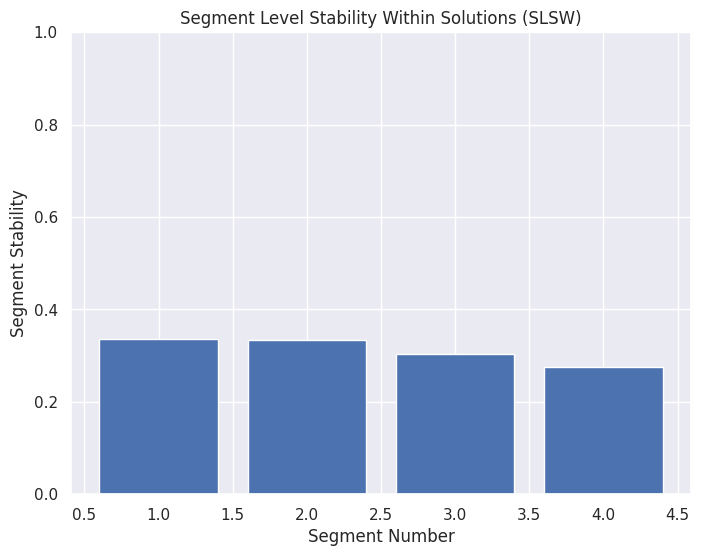

In [28]:
from sklearn.metrics import adjusted_rand_score

# Function to compute and plot SLSW
def plot_slsw(data, n_clusters=4, n_repeats=10):
    stability_scores = np.zeros(n_clusters)

    for i in range(n_repeats):
        kmeans = KMeans(n_clusters=n_clusters, random_state=i).fit(data)
        if i == 0:
            base_labels = kmeans.labels_
        else:
            for j in range(n_clusters):
                stability_scores[j] += adjusted_rand_score(base_labels, kmeans.labels_ == j)

    stability_scores /= n_repeats

    plt.figure(figsize=(8, 6))
    plt.bar(range(1, n_clusters + 1), stability_scores)
    plt.ylim(0, 1)
    plt.xlabel('Segment Number')
    plt.ylabel('Segment Stability')
    plt.title('Segment Level Stability Within Solutions (SLSW)')
    plt.show()

# Plot SLSW for the 4-segment solution
plot_slsw(seg_data, n_clusters=4)


# **Hierarchial Clustering with Dendogram**

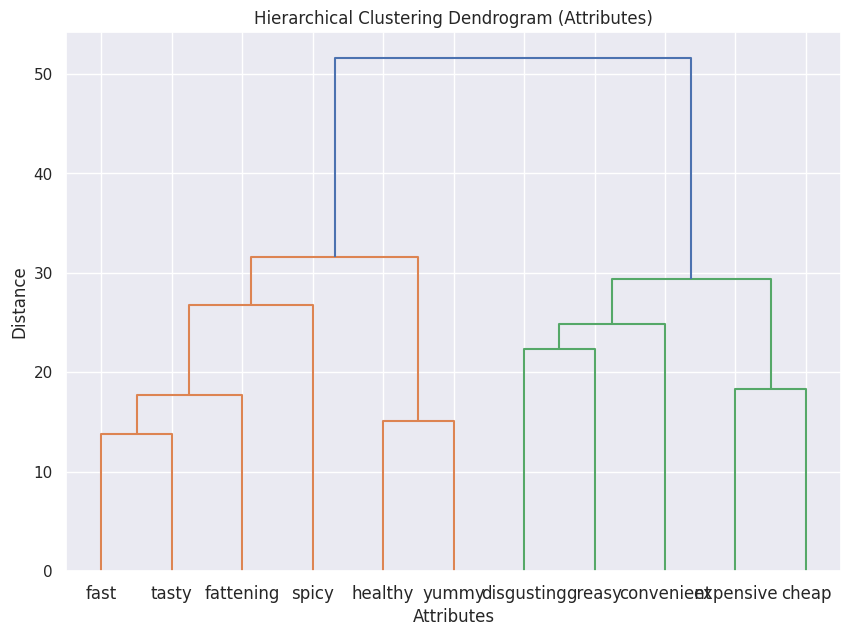

In [29]:

import scipy.cluster.hierarchy as sch


# Example data (replace with your actual data)
attributes = ['yummy', 'tasty', 'cheap', 'fattening', 'convenient', 'fast', 'spicy', 'healthy', 'greasy', 'expensive', 'disgusting']


# Hierarchical clustering
dist_matrix = sch.distance.pdist(seg_data.T, 'euclidean')
linkage_matrix = sch.linkage(dist_matrix, method='ward')

# Dendrogram for attribute clustering
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix, labels=attributes, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram (Attributes)')
plt.xlabel('Attributes')
plt.ylabel('Distance')
plt.show()


# **PC1 VS PC2 graph**

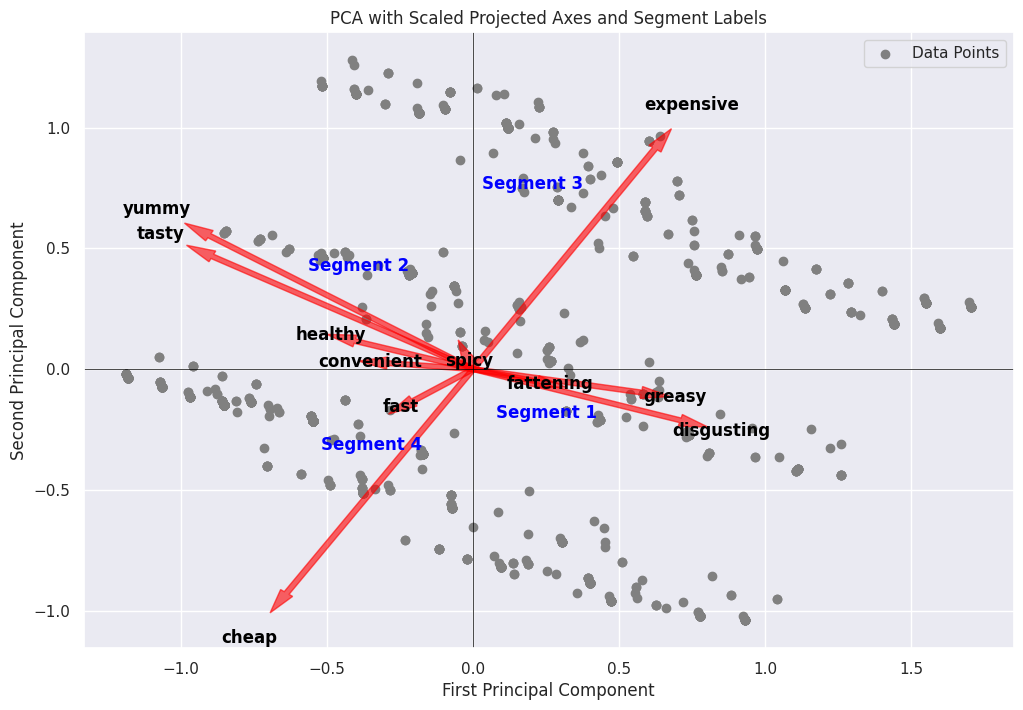

In [30]:
# Example segment labels (replace with your actual labels)
segment_labels = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4']

scaling_factor = 2.5  # Scaling factor for better visualization
scaled_factor_loadings = factor_loadings * scaling_factor

plt.figure(figsize=(12, 8))
# Scatter plot with segment labels
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], color='grey', label='Data Points')

# Plot the original axes (variable projections) with scaled arrows
for i, var in enumerate(seg_data.columns):
    plt.arrow(0, 0, scaled_factor_loadings[i, 0], scaled_factor_loadings[i, 1],
              color='red', alpha=0.6, head_width=0.05, head_length=0.1, width=0.02)
    plt.text(scaled_factor_loadings[i, 0] * 1.2, scaled_factor_loadings[i, 1] * 1.2, var,
             color='black', ha='center', va='center', fontsize=12, fontweight='bold')

# Label each data point with its segment
for i, label in enumerate(segment_labels):
    plt.text(pca_result[i, 0], pca_result[i, 1], label,
             color='blue', ha='right', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA with Scaled Projected Axes and Segment Labels')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


In [31]:
data["Cluster_labels"]= labels+1

In [32]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster_labels
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,1
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,3
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,3
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,2
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,1


# **Mosaic Plot - Segment vs Like**

Creating a mosaic plot to visualize the association between segment membership and the "Like" variable.

In [33]:
data['Like'].value_counts()

,count
Like,
+3,229
+2,187
0,169
+4,160
+1,152
I hate it!-5,152
I love it!+5,143
-3,73
-4,71


In [34]:
mapper= { "I hate it!-5": -5,
          "I love it!+5": 5,
          "+4": 4,
          "+3": 3,
          "+2": 2,
          "+1": 1,
          "0": 0,
          "-1": -1,
          "-2": -2,
          "-3": -3,
          "-4": -4,
                   }

data["Like"]= data["Like"].map(mapper)

In [35]:
data["Like"].value_counts()

,count
Like,
3,229
2,187
0,169
4,160
1,152
-5,152
5,143
-3,73
-4,71


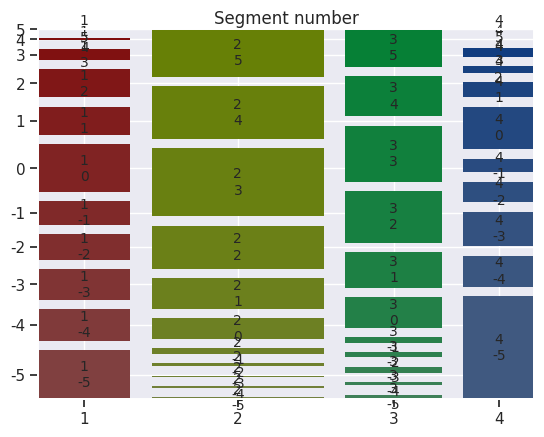

In [36]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a crosstab
crosstab = pd.crosstab(data['Cluster_labels'], data['Like'])


# Mosaic plot with shaded colors
mosaic(crosstab.stack(), gap=0.05, title="", axes_label=True)
plt.xlabel('Segment number')

plt.show()

# **Mosaic Plot - Segment vs Gender**

Text(0.5, 0, 'Segment number')

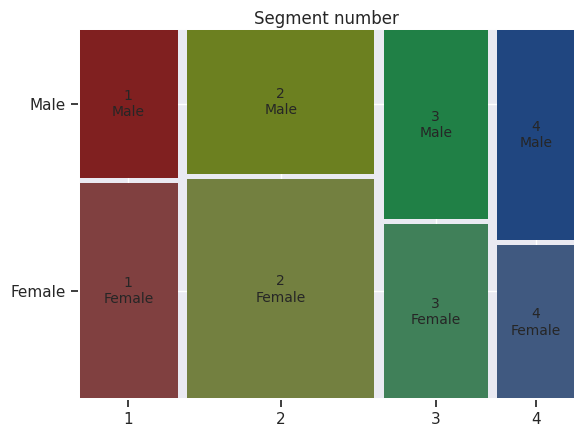

In [37]:
#Mosiac plot for gender

crosstab = pd.crosstab(data['Cluster_labels'], data['Gender'])


# Mosaic plot with shaded colors
mosaic(crosstab.stack(), gap=0.02, title="", axes_label=True)
plt.xlabel('Segment number')

# **Box and whisker plot between Age and Cluster labels**

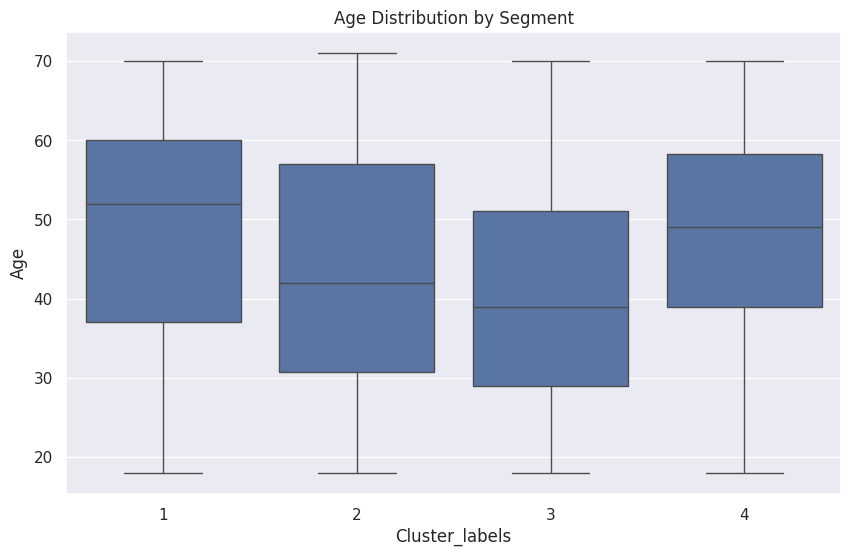

In [38]:
# Box-and-whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_labels', y='Age', data=data)
plt.title('Age Distribution by Segment')
plt.show()


# **Bubble Plot**

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   int64 
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
 15  Cluster_labels  1453 non-null   int32 
dtypes: int32(1), int64(2), object(13)
memory usage: 176.1+ KB


In [40]:
data["VisitFrequency"].value_counts()

,count
VisitFrequency,
Once a month,439
Every three months,342
Once a year,252
Once a week,235
Never,131
More than once a week,54


In [41]:
#Converting dtype to numeric

freq_mapping ={ "Once a month":3,
               "Every three months":4,
                "Once a year":5,
                "Once a week":1,
                "Never":6,
                "More than once a week":2}

data["VisitFrequency"]= data["VisitFrequency"].map(freq_mapping)

gender_mapping = {"Female": 0, "Male": 1}
data["Gender"] = data["Gender"].map(gender_mapping)

In [42]:
data["VisitFrequency"].value_counts()

,count
VisitFrequency,
3,439
4,342
5,252
1,235
6,131
2,54


In [43]:
# Compute the mean of VisitFrequency, Like, and Gender by segment
visit_means = data.groupby('Cluster_labels')['VisitFrequency'].mean()
like_means = data.groupby('Cluster_labels')['Like'].mean()
female_means = data.groupby('Cluster_labels')['Gender'].mean()

print("Visit Means:\n", visit_means)
print("Like Means:\n", like_means)
print("Female Means:\n", female_means)

Visit Means:
 Cluster_labels
1    4.323625
2    2.877586
3    3.015432
4    4.550000
Name: VisitFrequency, dtype: float64
Like Means:
 Cluster_labels
1   -1.495146
2    2.665517
3    2.120370
4   -2.675000
Name: Like, dtype: float64
Female Means:
 Cluster_labels
1    0.407767
2    0.398276
3    0.521605
4    0.579167
Name: Gender, dtype: float64


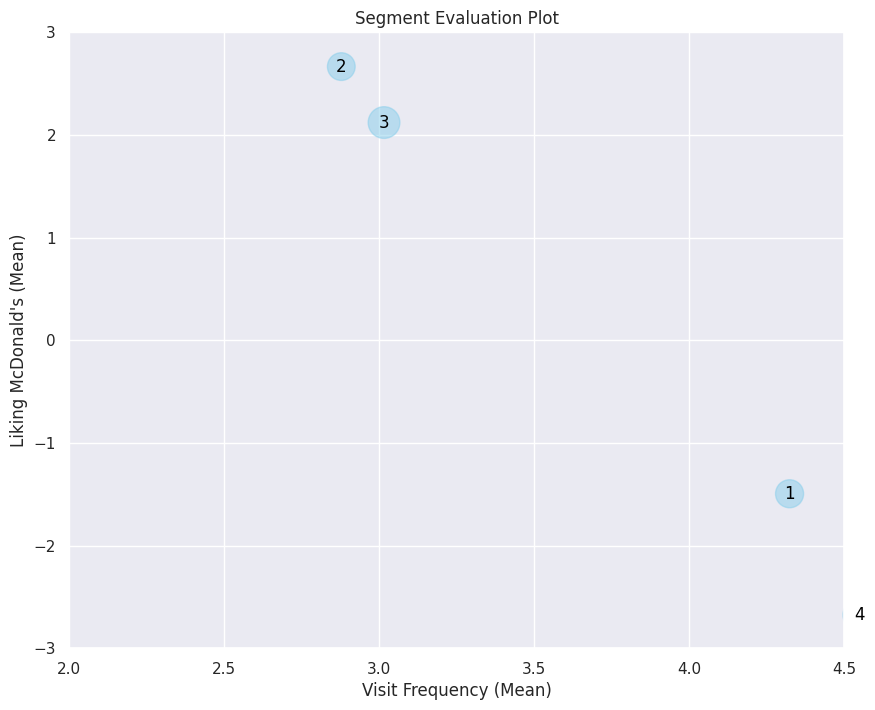

In [44]:
# Plotting
plt.figure(figsize=(10, 8))

# Plot the segments
plt.scatter(visit_means, like_means,
            s=female_means * 1000,  # Bubble size proportional to the percentage of females
            alpha=0.5, color='skyblue')

# Annotate the segments
for i in range(len(visit_means)):
    plt.text(visit_means.iloc[i], like_means.iloc[i],
             str(visit_means.index[i]), fontsize=12,
             ha='center', va='center', color='black')

# Set axis limits
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Labeling
plt.xlabel('Visit Frequency (Mean)')
plt.ylabel('Liking McDonald\'s (Mean)')
plt.title('Segment Evaluation Plot')

# Display the plot
plt.grid(True)
plt.show()
